## __Unveiling Insights: Analyzing Trends and Patterns Across Diverse News Categories__

<center>
  <img src="https://cdn.pixabay.com/photo/2018/06/21/16/32/newspapers-3488861_1280.jpg" width="500"/>
</center>


# Table of Contents
1. [**Introduction**](#1.Introduction)

   1.1. [**Problem Statement**](#1.1.Problem-Statement)  
   1.2. [**Objectives**](#1.2.Objectives)  
2. [**Importing Packages**](#2.Importing-Packages)  
3. [**Data loading and Inspection**](#3.Data-loading-and-Inspection)    
4. [**Data Cleaning**](#4.Data-Cleaning)  
5. [**Exploratory Data Analysis(EDA)**](#5.Exploratory-Data-Analysis(EDA))
6. [**Data Preprocessing**](#6.Data-Preprocessing)
7. [**Model development**](#7.Model-development)
8. [**Model Evaluation**](#8.Model-Evaluation)
9. [**Model Deployment**](#9.Model-Deployment)
10. [**Conclusion and Recommendations**](#10.Conclusion-and-Recommendations)
11. [**References**](#11.References)

### **1.Introduction**

#### *1.1.Problem Statement*

#### *1.2.Objectives*

### **2.Importing packages**

#### *2.1.Basic packages*

In [11]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import warnings
warnings.filterwarnings("ignore")

### *2.2.Preprocessing Packages*

In [13]:
import nltk
nltk.download(['punkt', 'stopwords', 'wordnet', 'punkt_tab'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from scipy.sparse import hstack

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### *2.2.Model development packages*

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import mlflow
import mlflow.sklearn
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

#### *2.3.Model evaluation packages*

### **3.Data loading and Inspection**

#### ***3.1.Data loading***

In [19]:
# url of the csv file
train_url = "https://github.com/DareSandtech/2407FTDS_Classification_Project/raw/refs/heads/main/Data/processed/train.csv"
test_url = "https://github.com/DareSandtech/2407FTDS_Classification_Project/raw/refs/heads/main/Data/processed/test.csv"

# load train data
train_df = pd.read_csv(train_url)

# load test data
test_df = pd.read_csv(test_url)

#### ***3.2.Data Inspection***

##### *3.2.1.Data Overview*

To begin, we will first look at the overview of our datasets and inspect their shapes to understand the structure of the data.

In [23]:
# Check the shape of the DataFrame
print("Shape of the train dataset:", train_df.shape)
print("Shape of the test dataset:", test_df.shape)

Shape of the train dataset: (5520, 5)
Shape of the test dataset: (2000, 5)


In [24]:
# Display the first 5 rows of the train_df to get a quick overview of the data
train_df.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [25]:
# Display the first 5 rows of test_df to get a quick overview of the data
test_df.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


##### *3.2.2.check for column naming conventions*

In [27]:
# Function to Verify If Column Names Adhere to the Correct Naming Convention
def check_col_naming_convention(df):
    """
    This function checks if the column names in the given DataFrame follow the 
    Capitalized Snake Case convention (e.g., 'Order_Date', 'Customer_Name').
    
    Args:
    df (pandas.DataFrame): The DataFrame to check.
    
    Returns:
    dict: A dictionary containing two lists:
          - 'compliant': Columns that follow Capitalized Snake Case.
          - 'non_compliant': Columns that do not follow Capitalized Snake Case.
    """
    
    # Regular expression to check for Capitalized Snake Case
    def is_capitalized_snake_case(col):
        return bool(re.match(r'^[A-Z][a-z0-9]*(_[A-Z][a-z0-9]*)*$', col))
    
    # Check all columns
    compliant_columns = [col for col in df.columns if is_capitalized_snake_case(col)]
    non_compliant_columns = [col for col in df.columns if not is_capitalized_snake_case(col)]
    
    return {
        'compliant': compliant_columns,
        'non_compliant': non_compliant_columns
    }

In [28]:
# Applying the 'check_col_naming_convention() function' on the datasets to see which column names are not compliant
print('Check column naming conventions for train_df')
print(check_col_naming_convention(train_df))
print()
print('Check column naming conventions for test_df')
print(check_col_naming_convention(test_df))

Check column naming conventions for train_df
{'compliant': [], 'non_compliant': ['headlines', 'description', 'content', 'url', 'category']}

Check column naming conventions for test_df
{'compliant': [], 'non_compliant': ['headlines', 'description', 'content', 'url', 'category']}


    - It seems that none of our column names are compliant, as they all start with lowercase letters, which is inconsistent with the standard naming conventions 

##### *3.2.3.Check for missing entries*

In [31]:
def check_missing_vals(df):
    """
    Checks for missing (null) values in each column of the provided DataFrame.
    
    Parameters:
    df (DataFrame): The pandas DataFrame to check for missing values.
    
    Returns:
    Series: A pandas Series where each element represents the count of missing 
            values in the corresponding column of the DataFrame.
    """
    # This function checks for missing entries in each column of the DataFrame 
    # and returns the count of missing entries in each column
    return df.isnull().sum()

# Printing the missing entries for the training dataset (train_df)
print('Train_df\n\n', check_missing_vals(train_df))

print('_' * 20)

# Printing the missing entries for the test dataset (test_df)
print('Test_df\n\n', check_missing_vals(test_df))

Train_df

 headlines      0
description    0
content        0
url            0
category       0
dtype: int64
____________________
Test_df

 headlines      0
description    0
content        0
url            0
category       0
dtype: int64


    - The datasets do not contain any missing entries, meaning that all entries in the datasets are complete and there are no null or NaN values present in any of the columns or rows

##### *3.2.4.Check for duplicate rows*

In [34]:
def check_dup_rows(df):
    """
    Checks for duplicate rows in the provided DataFrame.
    
    Parameters:
    df (DataFrame): The pandas DataFrame to check for duplicate rows.
    
    Returns:
    int: The total number of duplicate rows in the DataFrame.
    """
    # This function checks for duplicate rows in the DataFrame and returns
    # the count of duplicate rows found
    return df.duplicated().sum()

# Printing the duplicate entries for the training dataset (train_df)
print('Train_df\n\n', check_dup_rows(train_df))

print('_' * 20)

# Printing the duplicate entries for the test dataset (test_df)
print('Test_df\n\n', check_dup_rows(test_df))

Train_df

 0
____________________
Test_df

 0


    - The datasets do not contain any duplicate entries, all rows in the datasets are unique and there are no repeated records present in any of the columns or rows

##### *3.2.5.Check for duplicates column-wise*

In [37]:
def check_dup_cols(df):
    """
    Checks for duplicates column-wise in the provided DataFrame.
    
    Parameters:
    df (DataFrame): The pandas DataFrame to check for duplicates.
    
    Returns:
    Dictionary of the column names and the count of duplicates found
    """
    # Getting column names and creating dictionary to store count of duplicates
    cols = df.columns
    dups = {}

    # Finding the duplicates
    for col in cols:
        dups[col] = df[col].duplicated().sum()
    
    return dups

# Printing the duplicate entries for the training dataset (train_df)
print('Train_df\n\n', check_dup_cols(train_df))

print('_' * 20)

# Printing the duplicate entries for the test dataset (test_df)
print('Test_df\n\n', check_dup_cols(test_df))

Train_df

 {'headlines': 8, 'description': 12, 'content': 7, 'url': 6, 'category': 5515}
____________________
Test_df

 {'headlines': 0, 'description': 0, 'content': 0, 'url': 0, 'category': 1995}


    - The train dataset contains duplicate entries column-wise. The category column understandably contains duplicates, however, the other columns ideally should not contain any duplicates. For example, each url should be unique and the content of the newspaper should also be unique. As such, this requires some action in the data cleaning. 

#### __Observations__

- Upon reviewing the column naming conventions, we found that none of the columns adhere to the standard naming conventions
- The datasets are complete and do not contain any missing entries
- The train dataset contains duplicates in columns where duplicate entries should not exist


All identified inconsistencies will be handled in the data cleaning section to ensure that the dataset conforms to the necessary standards for analysis and modeling


### **4.Data cleaning**

#### ***4.1.Removing Duplicates***

In [42]:
def remove_dups(df):
    """
    Removes the rows containing duplicates column-wise
    
    Parameters:
    df (DataFrame): The pandas DataFrame to remove duplicates.
    
    Returns:
    DataFrame without duplicates
    """
    # Getting column names and dropping the category column
    cols = df.columns
    cols = cols.drop(cols[-1])

    # Removing the rows in which there are duplicates column-wise
    for col in cols:
        dups = df[df.duplicated(subset=[col], keep='first')]
        df = df[~df[col].isin(dups[col])]

    # Returning the DataFrame without duplicates
    return df

# Setting the train DataFrame to the duplicate-free DataFrame
train_df = remove_dups(train_df)

# Confirming that there are no duplicates
print(check_dup_cols(train_df))

{'headlines': 0, 'description': 0, 'content': 0, 'url': 0, 'category': 5479}


Since the total duplicates from each column account for less than 1% of the dataset, amputating them would not have a significant impact on the data. So, they have been removed using the `remove_dups()` function.

#### ***4.2.Fixing Column Names***

In [45]:
def fix_col_names(train_df, test_df):
    """
    This function updates column names of the data frame
    to standard naming conventions.

    Parameters:
    train_df and test_df: Two Pandas whose column names
    will be fixed.

    Returns:
    The fixed train_df and test_df dataframes.
    """

    # Getting the column names
    col_names = train_df.columns

    # Capitilizing the column names
    for col in col_names:
        train_df = train_df.rename(columns={col: col.capitalize()})
        test_df = test_df.rename(columns={col: col.capitalize()})

    return train_df, test_df

# Fixing the column names and displaying the updated column names
train_df, test_df = fix_col_names(train_df, test_df)
display(f'Train data column names: {train_df.columns.values}',
        f'Test data column names: {test_df.columns.values}')

"Train data column names: ['Headlines' 'Description' 'Content' 'Url' 'Category']"

"Test data column names: ['Headlines' 'Description' 'Content' 'Url' 'Category']"

The column names for the datasets have been corrected to meet the conventional naming standards of capitilizing the first letter of the names.

#### __Observations__

- The duplicates have been removed from the datasets
- The column names have been renamed to meet conventional naming standards

All inconsistencies identified in the data inspection section have been corrected.


### **5.Exploratory Data Analysis(EDA)**

#### ***5.1.Visualising The Training Data***

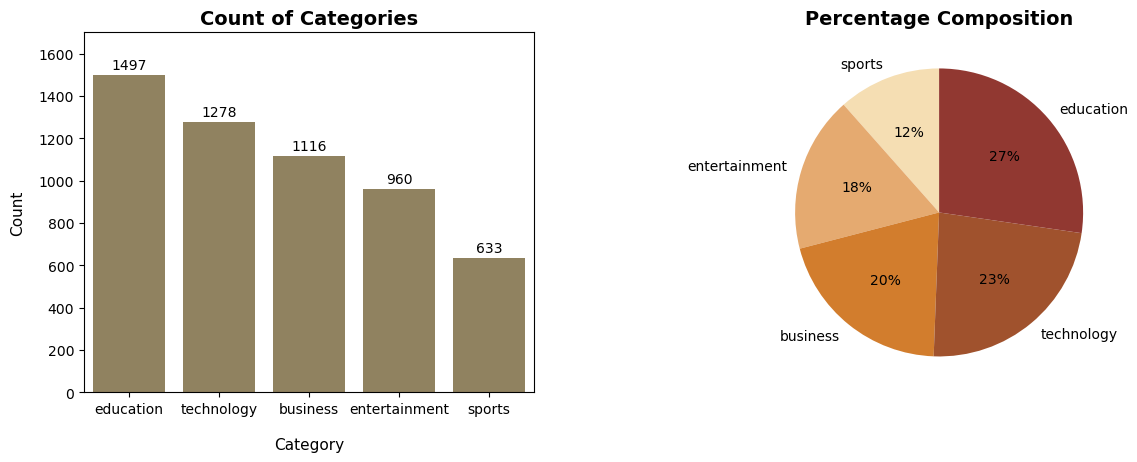

In [50]:
# Setting the canvas for the figures
fig1, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the frequency (count) chart for train_df
order = train_df['Category'].value_counts().index
sns.countplot(x=train_df['Category'],palette=['#988558'], hue=train_df['Category'],
              order=order, ax=axes[0])
axes[0].set_xlabel('Category', labelpad=15, fontsize=11)
axes[0].set_ylabel('Count', labelpad=10, fontsize=11)
axes[0].set_title('Count of Categories', weight='bold', fontsize=14)
axes[0].set_ylim(0, 1700)
for index, data in enumerate(train_df['Category'].value_counts()):
    axes[0].text(x=index, y=data+29, s=f'{data}', ha='center')

# Plotting the pie chart showing the % composition of each category for the train_df
freq_train = train_df['Category'].value_counts().sort_values(ascending=True)
pie_colors = ['#F5DEB3', '#E5AA70', '#D27D2D', '#A0522D', '#913831']

axes[1].pie(freq_train, labels=freq_train.index, autopct='%1.0f%%', 
            colors=sns.color_palette(pie_colors, len(freq_train)),
            startangle=90)
axes[1].set_title('Percentage Composition', weight='bold', fontsize=14)

fig1.subplots_adjust(left=0.1, right=1, bottom=0.2, top=0.8, wspace=0.4)
plt.show()

The train dataset has a total of 5484 rows. The `education` category has the most data, accounting for 27% of the data, followed by `technology` at 23%. `business` accounts for 20%, `entertainment` with 18%, and `sports` with the least amount of data at 12%. This shows an imbalance in the training data, with the category with the most data having more than double the amount of data as the category with the least amount of data.

#### ***5.2.Visualising The Testing Data***

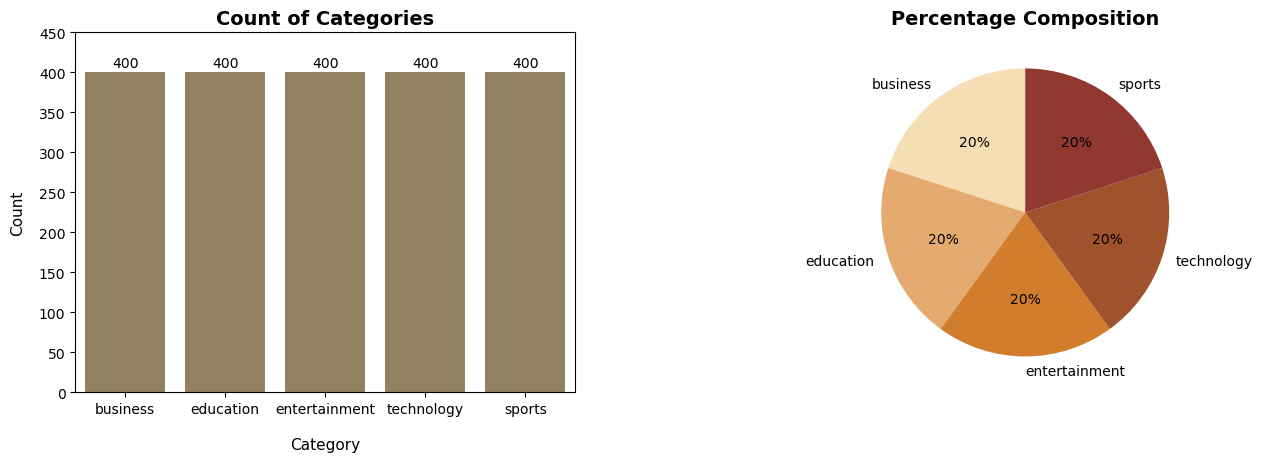

In [53]:
# Setting the canvas for the figures
fig2, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the frequency (count) chart for the test_df
order = test_df['Category'].value_counts().index
sns.countplot(x=test_df['Category'],palette=['#988558'], hue=test_df['Category'],
              order=order, ax=axes[0])
axes[0].set_xlabel('Category', labelpad=15, fontsize=11)
axes[0].set_ylabel('Count', labelpad=10, fontsize=11)
axes[0].set_title('Count of Categories', weight='bold', fontsize=14)
axes[0].set_ylim(0, 450)
for index, data in enumerate(test_df['Category'].value_counts()):
    axes[0].text(x=index, y=data+7, s=f'{data}', ha='center')

# Plotting the pie chart showing the % composition of each category for the test_df
freq_test = test_df['Category'].value_counts().sort_values(ascending=True)

axes[1].pie(freq_test, labels=freq_test.index, autopct='%1.0f%%', 
            colors=sns.color_palette(pie_colors, len(freq_test)),
            startangle=90)
axes[1].set_title('Percentage Composition', weight='bold', fontsize=14)

fig2.subplots_adjust(left=0, right=1, bottom=0.2, top=0.8, wspace=0.4)
plt.show()

The testing dataset contains a total of 2000 data entries with an equal split of 20% of the data for each category. This dataset is balanced.

#### ***5.3.Checking The Category Name In The URLs***

In [56]:
def check_url_category(df):
    """
    Checks if there is a category in the URL of each article.

    Parameters:
    df (DataFrame): One Pandas dataframe.

    Returns:
    count - Number of categories found in the urls
    rows_with_cat - Number of rows with at least one category in url
    rows_without_cat - Number of rows without a category in their url
    """
    # Listing the categories
    categories = ['business', 'education', 'entertainment', 'technology', 'sports']

    # Making all letters in the URL column to lowercase and setting our count to zero
    df['Url'].str.lower()
    count = 0

    # Finding the rows
    for category in categories:
        
        pattern1 = rf"\b{category}\b"
        count += df['Url'].str.contains(pattern1, regex=True, na=False).sum()

    pattern2 = '|'.join([rf"\b{cat}\b" for cat in categories])
    rows_with_cat = (df['Url'].str.contains(pattern2, regex=True, na=False)).sum()
    rows_without_cat = df[~df['Url'].str.contains(pattern2, regex=True, na=False)]

    # Returning our findings
    return count, rows_with_cat, rows_without_cat

# Displaying findings for the train dataset
print('Train_df\n', '_' * 150)
train_category_count, train_rows_with_cat, train_df_url_without_cat = check_url_category(train_df)
print(f'Number of categories found in the urls: {train_category_count}')
print(f'Number of rows with at least one category in url: {train_rows_with_cat}')
print(f'The length of the dataset: {len(train_df)}')
print(f'Number of rows with more than one category in url: {train_category_count - train_rows_with_cat}')
print(f'Number of rows without a category in their url: {len(train_df) - train_rows_with_cat}')
print('\n', 'Rows without categories\n')
display(train_df_url_without_cat)
print('\n', '_' * 150, '\n', '_' * 150)

# Displaying findings for the test dataset
print('\nTest_df\n', '_' * 150)
test_category_count, test_rows_with_cat, test_df_url_without_cat = check_url_category(test_df)
print(f'Number of categories found in the urls: {test_category_count}')
print(f'Number of rows with at least one category in url: {test_rows_with_cat}')
print(f'The length of the dataset: {len(test_df)}')
print(f'Number of rows with more than one category in url: {test_category_count - test_rows_with_cat}')
print(f'Number of rows without a category in their url: {len(test_df) - test_rows_with_cat}')
print('\n', 'Rows without categories\n')
display(test_df_url_without_cat)

Train_df
 ______________________________________________________________________________________________________________________________________________________
Number of categories found in the urls: 5525
Number of rows with at least one category in url: 5482
The length of the dataset: 5484
Number of rows with more than one category in url: 43
Number of rows without a category in their url: 2

 Rows without categories



,Headlines,Description,Content,Url,Category
353,Adoption of CBDCs can make cross-border paymen...,RBI Governor said the RBI is slowly and steadi...,Reserve Bank of India (RBI) Governor Shaktikan...,https://indianexpress.com/article/banking-and-...,business
1706,Century for Ballance on Zimbabwe debut against...,"Ballance, who switched allegiance last year an...",Former England test batsman Gary Ballance scor...,https://indianexpress.com/article/cricket/cent...,sports



 ______________________________________________________________________________________________________________________________________________________ 
 ______________________________________________________________________________________________________________________________________________________

Test_df
 ______________________________________________________________________________________________________________________________________________________
Number of categories found in the urls: 2011
Number of rows with at least one category in url: 2000
The length of the dataset: 2000
Number of rows with more than one category in url: 11
Number of rows without a category in their url: 0

 Rows without categories



,Headlines,Description,Content,Url,Category


The train dataset has 5482 rows which contain at least one category label in the URL. Since there are a total of 5484 rows in the dataset, only two rows do not have a recognized category. There is a total of 43 rows that have more than one category in their URL, meaning these rows can be classified in more than one category.

All the rows (2000 rows) of the test dataset have at least one category label in their URL with 11 of these rows having more than one category label. There are no rows that have unrecognized category label.

#### __Observations__

- The training dataset has an imbalance in the data by category. The category with the most data has more than double the data entries as the category with the least amount of data
- The testing dataset has no imbalance in the categorical data with each category accounting for 20% of the total data
- The training dataset has 5482 rows of data which contain at least one category label in the URL. Only two rows do not have a recognized category label in the URL. 43 of these rows have more than one recognized category label in the URL.
- The testing data has at least one category in each URL of all the data entries. There are 11 rows which contain more than one recognized category label in the URL.

### **6.Data Preprocessing**

#### ***6.1.Text Cleaning***

Text cleaning is an essential step in preparing textual data for analysis, ensuring consistency, readability, and relevance. It involves refining and standardizing the data by addressing __inconsistencies__ and removing __irrelevant__ or __redundant__ elements. This process enhances the text’s usability for various analytical and modeling tasks.




We first begin by handling links, where information embedded within the links is extracted to retain context or relevance. This step ensures that valuable data contained within URLs is not lost but instead transformed into a usable format, laying a solid foundation for further preprocessing tasks.

In [63]:
def extract_url_category(data, url_column):
    """
    Extracts a category from a URL column based on a list of predefined categories.
    If no category is found, assigns the mode (most common value) from 'Url_Category'.

    Args:
        data (pd.DataFrame): The input DataFrame.
        url_column (str): The column name containing URLs.

    Returns:
        pd.DataFrame: The updated DataFrame with a new 'Url_Category' column.
    """

    # List of predefined categories
    categories = ['business', 'education', 'entertainment', 'technology', 'sports']

    # Regex to match predefined categories
    category_pattern = r'(' + '|'.join(categories) + r')'

    # Extract categories based on the predefined list
    data['Url_Category'] = data[url_column].str.extract(category_pattern, expand=False)

    # Fill any NaN values in 'Url_Category' with the mode (most common value)
    mode_category = data['Url_Category'].mode()[0] if not data['Url_Category'].isnull().all() else 'url-web'

    data['Url_Category'] = data['Url_Category'].fillna(mode_category)

    # Drop the original URL column
    data = data.drop(columns=[url_column])

    # Rearrange columns for consistency
    data = data[['Headlines', 'Description', 'Content', 'Url_Category', 'Category']]

    return data


In [64]:
# Extract category information from the 'Url' column in the training dataset
train_df = extract_url_category(train_df, 'Url')

# Extract category information from the 'Url' column in the testing dataset
test_df = extract_url_category(test_df, 'Url')

In [65]:
# Overview of dataframe
train_df.head()

,Headlines,Description,Content,Url_Category,Category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,business,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,business,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,business,business


We then clean text by removing special characters, numbers, and punctuation to eliminate noise and ensure the data is simplified and consistent. This process focuses on retaining only meaningful textual information, making the content more suitable for analysis or machine learning tasks.

In [67]:
# Function to clean text (remove special characters, numbers, punctuation)
def clean_text(text):
    """
    Clean a given text by performing the following operations:
    - Convert the text to lowercase.
    - Remove all non-alphabetic characters (including digits, punctuation, and special characters).
    - Remove extra spaces.
    - Strip leading and trailing spaces.

    Parameters:
    text (str): The raw text that needs to be cleaned.

    Returns:
    str: The cleaned text.
    """
    # Convert text to lowercase
    text = text.lower()

    # Remove alphanumeric characters, special characters, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    
    # Strip leading/trailing spaces
    text = text.strip()
    
    return text


In [68]:
# Apply 'clean_text' on  each column in the train_df
train_df["Headlines_Clean_Text"] = train_df["Headlines"].apply(clean_text)  
train_df["Description_Clean_Text"] = train_df["Description"].apply(clean_text)  
train_df["Content_Clean_Text"] = train_df["Content"].apply(clean_text)  
train_df["Url_Category_Clean_Text"] = train_df["Url_Category"].apply(clean_text) 

# Apply 'clean_text' on  each column in the test_df
test_df["Headlines_Clean_Text"] = test_df["Headlines"].apply(clean_text)  
test_df["Description_Clean_Text"] = test_df["Description"].apply(clean_text)  
test_df["Content_Clean_Text"] = test_df["Content"].apply(clean_text)  
test_df["Url_Category_Clean_Text"] = test_df["Url_Category"].apply(clean_text)  

In [69]:
# Print the shape of the training dataset
print('Train_df shape:', train_df.shape)
# Print the shape of the testing dataset
print('Test_df shape:', test_df.shape)

Train_df shape: (5484, 9)
Test_df shape: (2000, 9)


    Our dataframe shapes have changed, with an increase in the number of columns, instead of cleaning the text in the original column, we created a new column to store the cleaned text. This approach allows us to track the progress of our preprocessing steps while preserving the raw data for reference or debugging purposes

In [71]:
# Overview of dataframe
train_df.head()

,Headlines,Description,Content,Url_Category,Category,Headlines_Clean_Text,Description_Clean_Text,Content_Clean_Text,Url_Category_Clean_Text
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business,business,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business,business,ndtv q net profit falls to rs crore impacted b...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,business,business,akasa air well capitalised can grow much faste...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,business,business,indias current account deficit declines sharpl...,the current account deficit cad was per cent o...,indias current account deficit declined sharpl...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,business,business,states borrowing cost soars to highest so far ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,business



### We now streamline the preprocessing of our textual data by creating dedicated functions for key tasks:


1.**Tokenize Function:** Breaks text into individual words or tokens, making it easier to process.

2.**Remove Stopwords Function:** Filters out commonly used words (e.g., "and," "the") that do not contribute significant meaning.

3.**Lemmatize Function:** Reduces words to their base or root form to ensure consistency.

4.**Preprocess Function:** Combines the above functions into a single workflow, allowing all steps to be executed in sequence for efficient text preprocessing.

In [73]:
# Function for tokenization
def tokenize_text(text):
    """
    Tokenizes a given text into words (tokens).
    
    This function uses the `word_tokenize` method from the NLTK library
    to split the input text into individual words, removing punctuation 
    and separating the text into meaningful chunks for further processing.

    Parameters:
    text (str): The text to be tokenized.
    
    Returns:
    list: A list of tokens (words) extracted from the input text.
    """
    # Tokenize the input text into words
    tokens = word_tokenize(text)
    
    # Return the list of tokens
    return tokens


In [74]:
# Function to remove stopwords
def remove_stopwords(tokens):
    """
    Removes stopwords from a list of tokens.
    
    Stopwords are common words that do not carry significant meaning 
    for text analysis (e.g., "the", "and", "is"). This function filters 
    out those words from the input token list.

    Parameters:
    tokens (list): A list of tokens (words) from which stopwords will be removed.
    
    Returns:
    list: A list of tokens with stopwords removed.
    """

    # Load the set of stopwords for the English language
    stop_words = set(stopwords.words('english'))

    # Filter out stopwords from the list of tokens
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Return the filtered list of tokens
    return filtered_tokens

In [75]:


def lemmatize_tokens(tokens):
    """
    Lemmatizes a list of tokens (words) to their base form.

    Parameters:
    tokens (list): A list of words (strings) to be lemmatized.

    Returns:
    list: A list of lemmatized words.
    
    Example:
    >>> lemmatize_tokens(["running", "better", "cats"])
    ['run', 'better', 'cat']
    """
    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize each word in the tokens list and return the results in a new list
    return [lemmatizer.lemmatize(word) for word in tokens]

In [76]:
# Function to preprocess text (clean, tokenize, remove stopwords, and lemmatize)
def preprocess_text(text):
    """
    Preprocesses the input text by performing tokenization, stopword removal,
    and lemmatization in sequence.

    The steps include:
    1. Tokenizing the text into individual words.
    2. Removing stopwords (common words with little meaning for analysis).
    3. Lemmatizing the remaining tokens to their base forms.

    Parameters:
    text (str): The raw text that needs to be processed.

    Returns:
    list: A list of preprocessed tokens (words).
    """
    # Tokenize the text into words
    tokens = tokenize_text(text)
    
    # Remove stopwords from the list of tokens
    tokens = remove_stopwords(tokens)
    
    # Lemmatize the remaining tokens
    tokens = lemmatize_tokens(tokens)
    
    # Return the preprocessed list of tokens
    return tokens

In [77]:
# Apply text preprocessing to each column separately
train_df["Headlines_Tokens"] = train_df["Headlines_Clean_Text"].apply(preprocess_text)  
train_df["Description_Tokens"] = train_df["Description_Clean_Text"].apply(preprocess_text)  
train_df["Content_Tokens"] = train_df["Content_Clean_Text"].apply(preprocess_text)  
train_df["Url_Category_Tokens"] = train_df["Url_Category_Clean_Text"].apply(preprocess_text)  

# Apply text preprocessing to each column separately
test_df["Headlines_Tokens"] = test_df["Headlines_Clean_Text"].apply(preprocess_text)  
test_df["Description_Tokens"] = test_df["Description_Clean_Text"].apply(preprocess_text)  
test_df["Content_Tokens"] = test_df["Content_Clean_Text"].apply(preprocess_text)  
test_df["Url_Category_Tokens"] = test_df["Url_Category_Clean_Text"].apply(preprocess_text)  

In [78]:
# Print the shape of the training dataset
print('Train_df shape:', train_df.shape)
# Print the shape of the testing dataset
print('Test_df shape:', test_df.shape)

Train_df shape: (5484, 13)
Test_df shape: (2000, 13)


    The number of columns increases further after preprocessing because new feature columns are created based on the original columns. Each original column undergoes transformations, such as tokenization, resulting in additional columns in the dataset

In [80]:
train_df.head()

,Headlines,Description,Content,Url_Category,Category,Headlines_Clean_Text,Description_Clean_Text,Content_Clean_Text,Url_Category_Clean_Text,Headlines_Tokens,Description_Tokens,Content_Tokens,Url_Category_Tokens
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business,business,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,business,"[rbi, revise, definition, politicallyexposed, ...","[central, bank, also, asked, chairperson, chie...","[reserve, bank, india, rbi, changed, definitio...",[business]
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business,business,ndtv q net profit falls to rs crore impacted b...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,business,"[ndtv, q, net, profit, fall, r, crore, impacte...","[ndtvs, consolidated, revenue, operation, r, c...","[broadcaster, new, delhi, television, ltd, mon...",[business]
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,business,business,akasa air well capitalised can grow much faste...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,business,"[akasa, air, well, capitalised, grow, much, fa...","[initial, share, sale, open, public, subscript...","[homegrown, server, maker, netweb, technology,...",[business]
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,business,business,indias current account deficit declines sharpl...,the current account deficit cad was per cent o...,indias current account deficit declined sharpl...,business,"[india, current, account, deficit, decline, sh...","[current, account, deficit, cad, per, cent, gd...","[india, current, account, deficit, declined, s...",[business]
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,business,business,states borrowing cost soars to highest so far ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,business,"[state, borrowing, cost, soar, highest, far, f...","[price, shot, reflecting, overall, higher, ris...","[state, forced, pay, nose, weekly, auction, de...",[business]


After tokenizing the text, we join the tokens back together into a single string to prepare the data for vectorization. This step ensures that the text is in a suitable format for techniques like TF-IDF or word embeddings, which convert the cleaned text into numerical representations for machine learning models.

In [82]:
# Join tokens for vectorization
train_df["Headlines_Tokens"] = train_df["Headlines_Tokens"].apply(lambda tokens: ' '.join(tokens))
train_df["Description_Tokens"] = train_df["Description_Tokens"].apply(lambda tokens: ' '.join(tokens))
train_df["Content_Tokens"] = train_df["Content_Tokens"].apply(lambda tokens: ' '.join(tokens))
train_df["Url_Category_Tokens"] = train_df["Url_Category_Tokens"].apply(lambda tokens: ' '.join(tokens))

test_df["Headlines_Tokens"] = test_df["Headlines_Tokens"].apply(lambda tokens: ' '.join(tokens))
test_df["Description_Tokens"] = test_df["Description_Tokens"].apply(lambda tokens: ' '.join(tokens))
test_df["Content_Tokens"] = test_df["Content_Tokens"].apply(lambda tokens: ' '.join(tokens))
test_df["Url_Category_Tokens"] = test_df["Url_Category_Tokens"].apply(lambda tokens: ' '.join(tokens))

In [83]:
train_df.head()

,Headlines,Description,Content,Url_Category,Category,Headlines_Clean_Text,Description_Clean_Text,Content_Clean_Text,Url_Category_Clean_Text,Headlines_Tokens,Description_Tokens,Content_Tokens,Url_Category_Tokens
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business,business,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,business,rbi revise definition politicallyexposed perso...,central bank also asked chairperson chief exec...,reserve bank india rbi changed definition poli...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business,business,ndtv q net profit falls to rs crore impacted b...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,business,ndtv q net profit fall r crore impacted lower ...,ndtvs consolidated revenue operation r crore r...,broadcaster new delhi television ltd monday re...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,business,business,akasa air well capitalised can grow much faste...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,business,akasa air well capitalised grow much faster ce...,initial share sale open public subscription ju...,homegrown server maker netweb technology india...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,business,business,indias current account deficit declines sharpl...,the current account deficit cad was per cent o...,indias current account deficit declined sharpl...,business,india current account deficit decline sharply ...,current account deficit cad per cent gdp usd b...,india current account deficit declined sharply...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,business,business,states borrowing cost soars to highest so far ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,business,state borrowing cost soar highest far fiscal,price shot reflecting overall higher risk aver...,state forced pay nose weekly auction debt tues...,business


#### ***6.2.Feature Extraction***


Feature extraction is the process of turning text into numerical data that machine learning models can understand. It helps capture the important patterns and meanings in the text, allowing the model to analyze the information and make predictions based on it

To ensure that machine learning models can effectively interpret and process categorical data, we first encode the target variable into a numerical format. This step is crucial because most machine learning algorithms require numerical inputs for model training. Once the encoding is complete, we also implement a decoding mechanism, which allows us to map the numeric values back to their original categorical labels. This ensures that we can easily interpret the numeric predictions of the model and understand which category each numerical value corresponds to.

In [87]:
# Function to encode categorical columns and also produce decoded column
def encode_and_decode(df_train, df_test, column_name):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit and transform on the training data
    df_train[column_name + "_Encoded"] = label_encoder.fit_transform(df_train[column_name])
    
    # Transform the test data (use the same encoding as the training data)
    df_test[column_name + "_Encoded"] = label_encoder.transform(df_test[column_name])

    # Store the mapping
    label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

    # Decode function (for reversing encoding)
    def decode_labels(encoded_values, mapping):
        reverse_mapping = {v: k for k, v in mapping.items()}  # Reverse the mapping
        return [reverse_mapping[val] for val in encoded_values]
    
    # Decode both train and test categories
    df_train['Decoded_' + column_name] = decode_labels(df_train[column_name + "_Encoded"], label_mapping)
    df_test['Decoded_' + column_name] = decode_labels(df_test[column_name + "_Encoded"], label_mapping)

    return df_train, df_test, label_mapping

In [88]:
# define datasets with encoded target columns
train_df, test_df, label_mapping = encode_and_decode(train_df, test_df, "Category")

print("\nLabel Mapping:", label_mapping)


Label Mapping: {'business': 0, 'education': 1, 'entertainment': 2, 'sports': 3, 'technology': 4}


In [89]:
train_df.head()

,Headlines,Description,Content,Url_Category,Category,Headlines_Clean_Text,Description_Clean_Text,Content_Clean_Text,Url_Category_Clean_Text,Headlines_Tokens,Description_Tokens,Content_Tokens,Url_Category_Tokens,Category_Encoded,Decoded_Category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business,business,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,business,rbi revise definition politicallyexposed perso...,central bank also asked chairperson chief exec...,reserve bank india rbi changed definition poli...,business,0,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business,business,ndtv q net profit falls to rs crore impacted b...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,business,ndtv q net profit fall r crore impacted lower ...,ndtvs consolidated revenue operation r crore r...,broadcaster new delhi television ltd monday re...,business,0,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,business,business,akasa air well capitalised can grow much faste...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,business,akasa air well capitalised grow much faster ce...,initial share sale open public subscription ju...,homegrown server maker netweb technology india...,business,0,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,business,business,indias current account deficit declines sharpl...,the current account deficit cad was per cent o...,indias current account deficit declined sharpl...,business,india current account deficit decline sharply ...,current account deficit cad per cent gdp usd b...,india current account deficit declined sharply...,business,0,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,business,business,states borrowing cost soars to highest so far ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,business,state borrowing cost soar highest far fiscal,price shot reflecting overall higher risk aver...,state forced pay nose weekly auction debt tues...,business,0,business


Next, we extract our target variables from the datasets, keeping them separate from the features for model training

In [91]:
# train_df target variable
y_train_set = train_df["Category_Encoded"]

#Test_df target variable
y_test_set = test_df["Category_Encoded"]


__Combining Features and Vectorization:__

Before we move on to vectorization, we start by combining all the relevant features in our train_df. This gives us a unified dataset that includes everything the model needs for training. Once we have the combined features, we apply vectorization to transform them into numerical form, so the machine learning model can understand and work with the data.

For the test_df, we combine the features in the same way as the training data. The key here is that when we set up the vectorizer for the test data, we use the vocabulary learned from the training data. This is important because the model needs to recognize the same terms and features in both the training and test sets. By setting the vectorizer’s vocabulary to the one learned during training, we ensure that the test data is treated in the same way as the training data, meaning it will have the same feature representation and allow the model to make accurate predictions.

In [93]:
# Combine Tokenized Columns for Training Data to ensure all text features are used together for vectorization
train_df['Combined'] = (
    train_df["Headlines_Tokens"] + 
    train_df["Description_Tokens"] + 
    train_df["Content_Tokens"] + 
    train_df["Url_Category_Tokens"]
)

# Initialize and Apply TF-IDF Vectorizer on Training Data
vectorizer = TfidfVectorizer(max_features=6000) 
X_train_set = vectorizer.fit_transform(train_df['Combined']).toarray()

# Extract and Save the Vocabulary
# The vectorizer learns a vocabulary (list of unique words) from the training data.
feature_names = vectorizer.get_feature_names_out()

# Save the vocabulary to a text file
np.savetxt('Vectorizer_vocabulary.txt', feature_names.astype(str),fmt='%s')

# Just like with training data, we combine the tokenized text columns.
test_df['Combined'] = (
    test_df["Headlines_Tokens"] + 
    test_df["Description_Tokens"] + 
    test_df["Content_Tokens"] + 
    test_df["Url_Category_Tokens"]
)

# We initialize a new vectorizer but set its vocabulary to the one learned from training.
test_vectorizer = TfidfVectorizer(vocabulary = feature_names)

# Transform Test Data Using the Pre-learned Vocabulary
X_test_set = vectorizer.transform(test_df['Combined']).toarray()

We will split train_df into training and validation subsets, where the validation subset will be used to fine-tune and evaluate the model during development. Meanwhile, test_df will remain untouched and serve as the final benchmark to assess the model's performance on completely unseen data.

In [95]:

# Splitting the dataset
X_train, X_validation, y_train, y_validation = train_test_split(X_train_set, y_train_set, test_size=0.2, random_state=42)


   
The __X_train__ and __y_train subsets__ will be used to train the models, allowing them to learn patterns and relationships from the data. The __X_validation__ and __y_validation__ subsets will be used for validation testing, helping to fine-tune the models and evaluate their performance during training. Finally, the __X_test_set__ and __y_test_set__ will remain untouched and will be used as the final evaluation set. This ensures the models are tested on entirely unseen data, offering an accurate assessment of their overall performance.

### **7.Model development**

In this section, 7 machine learning models were developed. Each model was developed using Scikit-learn's `GridSearchCV` for hyperparameter tuning. The data used to find the best hyperparameters for each model are `X_train` and `y_train` for training the models, and `X_validation` and `y_validation` for testing the models. Since the training and validation data has a class imbalance, Scikit-learn's `log_loss` function was used to select the models with the best hyperparameters. While `accuracy` may show the model's confidence, the `log_loss` function applies a heavy penalty when the model confidently makes misclassifications. This forces the model to be accurate in all classifcations. This is especially important when there is an imbalance in the data used to train the models, where classes with fewer training data may be less accurately classified than classes with the majority of the data. A `log_loss` value close to zero (`log_loss` ~ 0) means the model is confident and accurate in its predictions. A `log_loss` value of one or more (`log_loss` ~ 1 or more) means the model is poor in its predictions. Ideally, we want the `log_loss` of our models to be as close to zero as possible.

The models are detailed in the following sections. All models were developed with MLflow for recording the different hyperparameter combinations and their respective performances. The hyperparameters that were chosen to be included in the development were chosen based on their importance in improving their respective models. There were hardware limitations when training the models. The actually arguments (values) used in the hyperparameters were set such that there was balance between model performance and training runtime. 

Starting with setting up the mlflow environment:

In [101]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [102]:
print(mlflow.get_tracking_uri())

http://127.0.0.1:5000


Defining the functions to display the confusion matrix and decisions boundaries for each model.

In [104]:
def conf_matrix_visualizer(conf_matrix, model_name):
    """
    Plots the confusion matrix of a K-Nearest Neighbor model with 5 classes.

    Parameters:
    - confusion matrix
    """

    labels = {v: k for k, v in label_mapping.items()}
    
    class_labels = [labels[i] for i in range(5)]

    plt.figure(figsize=(8, 8))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
    disp.plot(cmap="Blues", values_format="d")  # 'd' for integer values
    plt.xticks(rotation=90)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

In [105]:
def decision_boundaries_visualizer(model,
                                   model_name,
                                   X_train,
                                   X_validation,
                                   y_train,
                                   y_validation,
                                   feature_indices=[1, 2]):

    """
    Plot the decision boundary of a KNN model for two selected features.

    Parameters:
    - model: Trained KNN model
    - X_vailation: Feature matrix
    - y_validation: Target variable
    - feature_indices: Indices of the two features to plot
    """

    # Extract the two selected features
    X_fit = X_train[:, feature_indices]
    X_selected = X_validation[:, feature_indices]

    model.fit(X_fit, y_train)

    # Define the min and max for the two features
    x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
    y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1

    # Create a meshgrid of points
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    # Predict on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(12, 8))
    cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF'])
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

    # Scatter the actual data points
    scatter = plt.scatter(
        X_selected[:, 0],
        X_selected[:, 1],
        c=y_validation,
        edgecolor='k',
        cmap=cmap_points
    )

    # Map numeric labels to class names
    labels = {v: k for k, v in label_mapping.items()}
    legend_labels = [labels[label] for label in np.unique(y_validation)]

    # Add legend with class names instead of numeric labels
    handles, labels = scatter.legend_elements()
    plt.legend(handles, legend_labels, title='Classes')
    
    # Label the plot
    plt.title(f'Decision Boundaries of the {model_name} Model')
    plt.xlabel(f'Feature {feature_indices[0]}')
    plt.ylabel(f'Feature {feature_indices[1]}')
    plt.show()

#### ***7.1.K-Nearest Neighbor***

Setting the MLflow environment for the K-Nearest Neighbor (KNN) model for hyperparameter tuning and selection.

In [108]:
knn_experiment_name = 'KNN Model'
#experiment_id = mlflow.create_experiment(knn_experiment_name)
mlflow.set_experiment(knn_experiment_name)

2025/02/03 09:26:26 INFO mlflow.tracking.fluent: Experiment with name 'KNN Model' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/167316219658161059', creation_time=1738567586197, experiment_id='167316219658161059', last_update_time=1738567586197, lifecycle_stage='active', name='KNN Model', tags={}>

Developing the model and tracking the metrics on mlflow.

##### *7.1.1.Developing the model and tracking the metrics on mlflow.*

The `KNeighborsClassifier` from the `neighbors` module in Scikit-learn library works differently from the other models developed in this notebook. It does not train and learn from the training data like other models. Instead, it stores the data and  classifies new data by comparing it to stored examples. This model generally takes long to develop especially for large datasets.

In [112]:
def develop_knn(X_train, X_validation, y_train, y_validation):
    """
    - Trains a K-Nearest Neighbor model using a GridSearchCV for
    hyperparameter tuning.
    - Logs the metrics of model onto an MLflow server.
    
    Parameters:
    - X_train - Training features
    - y_train - Training target variable
    - X_validation - Testing features
    - y_validation - Testing variables

    Returns:
    - best_model - Model that performed the best
    - conf_matrix - The confusion matrix of the best model
    - best_report - The classification report of the best model
    """

    knn_model = KNeighborsClassifier()
    # Define parameter grid
    param_grid = {
        'n_neighbors': [30, 20],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

    # Set up the scorer for the GridSearchCV
    scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
    
    # Set up GridSearchCV
    knn_grid_search = GridSearchCV(
        knn_model,
        param_grid,
        cv=2,
        scoring=scorer,
        refit='log_loss',
        return_train_score=True,
        n_jobs=-1
    )
    
    # Start MLflow run
    with mlflow.start_run(run_name='KNN GridSearchCV Try 8'):
        # Fit the model
        knn_grid_search.fit(X_train, y_train)

        # Log metrics for all parameter combinations
        results = knn_grid_search.cv_results_
        for i in range(len(results['params'])):
            params = results['params'][i]
            
            # Predict on the validation set for each parameter combination
            model = knn_grid_search.estimator.set_params(**params)
            model.fit(X_train, y_train)
            knn_y_pred = model.predict(X_validation)
            knn_y_pred_proba = model.predict_proba(X_validation)
            
            # Generate classification report
            report = classification_report(y_validation, knn_y_pred, output_dict=True)
            log_loss_value = log_loss(y_validation, knn_y_pred_proba)
            
            # Log metrics and parameters for each parameter combination
            with mlflow.start_run(run_name=f"Run {i + 1}", nested=True):
                # Log parameters
                mlflow.log_params(params)
                
                # Log metrics from the classification report
                mlflow.log_metric('accuracy', report['accuracy'])
                mlflow.log_metric('precision_weighted', report['weighted avg']['precision'])
                mlflow.log_metric('recall_weighted', report['weighted avg']['recall'])
                mlflow.log_metric('f1_score_weighted', report['weighted avg']['f1-score'])
                mlflow.log_metric('log_loss', log_loss_value)
    
        # Log the best model
        best_model = knn_grid_search.best_estimator_
        best_params = knn_grid_search.best_params_
        y_best_pred = best_model.predict(X_validation)
        y_best_pred_proba = best_model.predict_proba(X_validation)
        best_report = classification_report(y_validation, y_best_pred, output_dict=True)
        best_log_loss_value = log_loss(y_validation, y_best_pred_proba)
        conf_matrix = confusion_matrix(y_validation, y_best_pred)
        
        # Log the best parameters
        mlflow.log_params(best_params)
        
        # Log metrics for the best model
        mlflow.log_metric('best_accuracy', best_report['accuracy'])
        mlflow.log_metric('best_precision_weighted', best_report['weighted avg']['precision'])
        mlflow.log_metric('best_recall_weighted', best_report['weighted avg']['recall'])
        mlflow.log_metric('best_f1_score_weighted', best_report['weighted avg']['f1-score'])
        mlflow.log_metric('best_log_loss', best_log_loss_value)
        
        # Log the best model
        mlflow.sklearn.log_model(best_model, 'best_model')
    
    # Output results
    print('Best Parameters:', knn_grid_search.best_params_)
    print('Test Set Accuracy (Best Model):', best_report['accuracy'])
    print('Best cross validation log_loss (train):', -knn_grid_search.best_score_)
    print('Best log loss (validation):', best_log_loss_value)

    # Returning the best model
    return best_model, conf_matrix, best_report

Getting the best KNN model (`best_knn_model`) along with its confusion matrix (`knn_conf_matrix`) and classification report (`knn_class_report`) based on the best log_loss value.

In [ ]:
best_knn_model, knn_conf_matrix, knn_class_report = develop_knn(X_train, X_validation, y_train, y_validation)

The training cross validation (CV) `log_loss` is good, at 0.19379, with an accuracy of 0.97083. What's better is that the `log_loss` value slightly improves on the validation testing data, going down to 0.12755. This means that the model generalised slightly better to the testing data which was unseen to the model before testing. The `log_loss` values themselves are decently close to zero, meaning the model is likely not guessing its predictions.

##### *7.1.2.Visualizing the confusion matrix for the best KNN model*

In [ ]:
conf_matrix_visualizer(knn_conf_matrix, 'K-Nearest Neighbor')

The confusion matrix shows the number of classifications in the validation (testing) data that were correctly predicted by the model. The correct predictions for each class are provided diagonally, where the class in the `True label` (vertical axis) meets the class in the `Predicted label` (horizontal axis). The number of wrong predictions appear in the rest of the cells. In the case of this KNN model, the model had a decent performance, correctly predicting most of the data. However, it had some notable incorrect predictions, particularly between the `business` and `technology` classes which have the highest misclassifications.

##### *7.1.3.Visualizing the decision boundaries for the KNN model*

Visualization is only possible between two features at a time. Change the input `feature_indices` to visualize between the selected features.

In [ ]:
feature_indices = [3, 2] # Value range is [0-4386, 0-5999], shape(4387, 6000)
decision_boundaries_visualizer(best_knn_model,
                               'k-Nearest Neighbor',
                               X_train,
                               X_validation,
                               y_train,
                               y_validation,
                               feature_indices
                             )

Depending on the input in the `feature_indices`, the displayed graph should show a colour-shaded canvas with each colour representing where the model would predict each class to be (i.e. the model's prediction probability for each class for the selected features). The dots are datapoints of the actual classes between the two selected features. If the colour of the dot does not match the colour of its background, then the model misclassified this datapoint. If the colours match between the datapoints and the background, then the model classified these datapoints correctly. This is the case for all decision boundary visuals of the other models in this notebook, so, bare this in mind when looking at these visuals.

#### ***7.2.Naive Bayes***

Setting up the mlflow environment for the Naive Bayes (NB) model

In [ ]:
nb_experiment_name = 'Naive Bayes Model'
#experiment_id = mlflow.create_experiment(nb_experiment_name)
mlflow.set_experiment(nb_experiment_name)

##### *7.2.1.Developing the model and tracking the metrics on mlflow.*

As this is a classification problem, the `MultinomialNB` model from the `naive_bayes` module in the Scikit-learn library was used in this sub-section.

In [ ]:
def develop_nb(X_train, X_validation, y_train, y_validation):
    """
    - Trains a Multinomial Naive Bayes model using a GridSearchCV for
    hyperparameter tuning.
    - Logs the metrics of model onto an MLflow server.
    
    Parameters:
    - X_train - Training features
    - y_train - Training target variable
    - X_validation - Testing features
    - y_validation - Testing variables

    Returns:
    - best_model - Model that performed the best
    - conf_matrix - The confusion matrix of the best model
    - best_report - The classification report of the best model
    """

    # Define model
    nb_model = MultinomialNB()

    # Define parameter grid
    num_classes = len(np.unique(y_train))
    param_grid = {
        'alpha': [0.1, 1.0, 5, 10],
        'fit_prior': [True, False],  
        'class_prior': [
            [1/num_classes] * num_classes,
            [0.1, 0.2, 0.3, 0.2, 0.2],
            [0.1, 0.1, 0.2, 0.4, 0.2],
            [0.3, 0.3, 0.05, 0.2, 0.15],
            [0.25, 0.25, 0.25, 0.15, 0.1],
            [0.5, 0.1, 0.1, 0.1, 0.2],
            None
        ]
    }

    # Define scorer
    scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

    # Define GridSearch
    nb_grid_search = GridSearchCV(
        nb_model,
        param_grid,
        scoring=scorer,
        refit='log_loss',
        cv=3,
        return_train_score=True,
        n_jobs=-1
    )

    # Start mlflow run
    with mlflow.start_run(run_name="NB GridSearchCV Try 6"):

        # Fit the grid search model
        nb_grid_search.fit(X_train, y_train)

        # Log metrics for all parameter combinations
        results = nb_grid_search.cv_results_

        for i in range(len(results['params'])):
            params = results['params'][i]

            # Predict on the validation set for each parameter combination
            model = nb_grid_search.estimator.set_params(**params)
            model.fit(X_train, y_train)
            nb_y_pred = model.predict(X_validation)
            nb_y_pred_proba = model.predict_proba(X_validation)

            # Classification report and log loss
            report = classification_report(y_validation, nb_y_pred, output_dict=True)
            log_loss_value = log_loss(y_validation, nb_y_pred_proba)

            with mlflow.start_run(run_name=f"Run {i + 1}", nested=True):
                # Log parameters
                mlflow.log_params(params)

                # Log metrics from the classification report
                mlflow.log_metric('accuracy', report['accuracy'])
                mlflow.log_metric('precision_weighted', report['weighted avg']['precision'])
                mlflow.log_metric('recall_weighted', report['weighted avg']['recall'])
                mlflow.log_metric('f1_score_weighted', report['weighted avg']['f1-score'])
                mlflow.log_metric('log_loss', log_loss_value)


        # Log the best model
        best_model = nb_grid_search.best_estimator_
        best_params = nb_grid_search.best_params_
        y_best_pred = best_model.predict(X_validation)
        y_best_pred_proba = best_model.predict_proba(X_validation)
        best_report = classification_report(y_validation, y_best_pred, output_dict=True)
        best_log_loss_value = log_loss(y_validation, y_best_pred_proba)
        conf_matrix = confusion_matrix(y_validation, y_best_pred)

        # Log the best parameters
        mlflow.log_params(best_params)
        
        # Log metrics for the best model
        mlflow.log_metric('best_accuracy', best_report['accuracy'])
        mlflow.log_metric('best_precision_weighted', best_report['weighted avg']['precision'])
        mlflow.log_metric('best_recall_weighted', best_report['weighted avg']['recall'])
        mlflow.log_metric('best_f1_score_weighted', best_report['weighted avg']['f1-score'])
        mlflow.log_metric('best_log_loss', best_log_loss_value)

        mlflow.sklearn.log_model(best_model, 'best_model')
    
    # Output results
    print('Best Parameters:', nb_grid_search.best_params_)
    print('Test Set Accuracy (Best Model):', best_report['accuracy'])
    print('Best cross validation log_loss (train):', -nb_grid_search.best_score_)
    print('Best log loss (validation):', best_log_loss_value)

    # Returning the best model
    return best_model, conf_matrix, best_report


Getting the best NB model (`best_nb_model`) along with its confusion matrix (`nb_conf_matrix`) and classification report (`nb_class_report`) based on the best log_loss value.

In [ ]:
best_nb_model, nb_conf_matrix, nb_class_report = develop_nb(X_train, X_validation, y_train, y_validation)

The CV `log_loss` is in the ideal range for this value at 0.06828, and gets better in the validation testing data down to 0.05147. This means the model generalised very well to unseen data, making it highly confident in its predicting abilities. A larger unseen data is still necessary to learn more about the generalisability of the model with hopes that the `log_loss` value will remain in the same range as the ones in the training.

##### *7.2.2.Visualizing the confusion matrix for the best NB model*

In [ ]:
conf_matrix_visualizer(nb_conf_matrix, 'Naive Bayes')

Even though the model is more accurate and confident in its predictions, it still has a similar weakness to the KNN model in that it struggles with classifying between the `business` and `technology` data. Apart from that, it seems to have performed quite well.

##### *7.2.3.Visualizing the decision boundaries for the NB model*

In [ ]:
feature_indices = [5, 60] # Value range is [0-4386, 0-5999], shape(4387, 6000)
decision_boundaries_visualizer(best_nb_model,
                               'Naive Bayes',
                               X_train,
                               X_validation,
                               y_train,
                               y_validation,
                               feature_indices
                             )

#### ***7.3.Neural Networks***

Setting up the mlflow environment for the Neural Networks (NN) model

In [ ]:
nn_experiment_name = 'Neural Network Model'
#experiment_id = mlflow.create_experiment(nn_experiment_name)
mlflow.set_experiment(nn_experiment_name)

##### *7.3.1.Developing the model and tracking the metrics on mlflow*

An `MLPClassifier` from the `neural_network` module in Scikit-learn library was used to develop the NN model. The `Sequential` model from the `keras` module in TensorFlow library does not work seemlessly with Scikit-learn packages like the `GridSearchCV` used for hyperparameter tuning. Often times, a wrapper of some sort is required to compatibilize these packages from different libraries. Sometimes these wrappers may not be updated as often as required and this may cause unnecessary errors. Since the majority of the packages used in this notebook are from the Scikit-learn library, the neural network model was also selected from the Scikit-learn `neural_network` module.

In [ ]:
def develop_nn(X_train, X_validation, y_train, y_validation):
    """
    - Trains a Neural Network model using a GridSearchCV for hyperparameter tuning.
    - Logs the metrics of model onto an MLflow server.
    
    Parameters:
    - X_train - Training features
    - y_train - Training target variable
    - X_validation - Testing features
    - y_validation - Testing variables

    Returns:
    - best_model - Model that performed the best
    - conf_matrix - The confusion matrix of the best model
    - best_report - The classification report of the best model
    """

    # Initialize MLPClassifier
    mlp = MLPClassifier(solver='adam', random_state=42)

    # Define hyperparameter grid for GridSearchCV
    param_grid = {
        'hidden_layer_sizes': [(10, 10), (20, 20), (10, 20)], 
        'activation': ['relu'],  
        'alpha': [0.0001, 0.001, 0.01], 
        'learning_rate': ['constant'], 
        'batch_size': [32], 
        'max_iter': [1000, 20], 
    }

    scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
    
    # Set up GridSearchCV with log_loss as scoring
    nn_grid_search = GridSearchCV(
        estimator=mlp,
        param_grid=param_grid,
        cv=3,
        n_jobs=-1,
        refit='log_loss',
        return_train_score=True,
        scoring=scorer
        )

    # Start mlflow run
    with mlflow.start_run(run_name="NN GridSearchCV Try 3"):

        # Fit the grid search model
        nn_grid_search.fit(X_train, y_train)

        # Log metrics for all parameter combinations
        results = nn_grid_search.cv_results_

        for i in range(len(results['params'])):
            params = results['params'][i]

            # Predict on the validation set for each parameter combination
            model = nn_grid_search.estimator.set_params(**params)
            model.fit(X_train, y_train)
            nn_y_pred = model.predict(X_validation)
            nn_y_pred_proba = model.predict_proba(X_validation)

            # Classification report and log loss
            report = classification_report(y_validation, nn_y_pred, output_dict=True)
            log_loss_value = log_loss(y_validation, nn_y_pred_proba)

            with mlflow.start_run(run_name=f"Run {i + 1}", nested=True):
                # Log parameters
                mlflow.log_params(params)

                # Log metrics from the classification report
                mlflow.log_metric('accuracy', report['accuracy'])
                mlflow.log_metric('precision_weighted', report['weighted avg']['precision'])
                mlflow.log_metric('recall_weighted', report['weighted avg']['recall'])
                mlflow.log_metric('f1_score_weighted', report['weighted avg']['f1-score'])
                mlflow.log_metric('log_loss', log_loss_value)


        # Log the best model
        best_model = nn_grid_search.best_estimator_
        best_params = nn_grid_search.best_params_
        y_best_pred = best_model.predict(X_validation)
        y_best_pred_proba = best_model.predict_proba(X_validation)
        best_report = classification_report(y_validation, y_best_pred, output_dict=True)
        best_log_loss_value = log_loss(y_validation, y_best_pred_proba)
        conf_matrix = confusion_matrix(y_validation, y_best_pred)

        # Log the best parameters
        mlflow.log_params(best_params)
        
        # Log metrics for the best model
        mlflow.log_metric('best_accuracy', best_report['accuracy'])
        mlflow.log_metric('best_precision_weighted', best_report['weighted avg']['precision'])
        mlflow.log_metric('best_recall_weighted', best_report['weighted avg']['recall'])
        mlflow.log_metric('best_f1_score_weighted', best_report['weighted avg']['f1-score'])
        mlflow.log_metric('best_log_loss', best_log_loss_value)

        mlflow.sklearn.log_model(best_model, 'best_model')
    
    # Output results
    print('Best Parameters:', nn_grid_search.best_params_)
    print('Test Set Accuracy (Best Model):', best_report['accuracy'])
    print('Best cross validation log_loss (train):', -nn_grid_search.best_score_)
    print('Best log loss (validation):', best_log_loss_value)

    # Returning the best model
    return best_model, conf_matrix, best_report
    

Getting the best NN model (`best_nn_model`) along with its confusion matrix (`nn_conf_matrix`) and classification report (`nn_class_report`) based on the best log_loss value.

In [ ]:
best_nn_model, nn_conf_matrix, nn_class_report = develop_nn(
                                                    X_train, 
                                                    X_validation, 
                                                    y_train, 
                                                    y_validation
                                                )

Similarly to the NB model, the CV `log_loss` of the NN model looks healthy at 0.05478 and gets slightly better in the validation testing with a value of 0.04502.

##### *7.3.2.Visualizing the confusion matrix for the best NN model*

In [ ]:
conf_matrix_visualizer(nn_conf_matrix, 'Neural Networks')

The trend of having more misclassified data between the `business` and `technology` classes continues in this model. The good news is that this model has a lower number of these misclassifications compared to the KNN and NB models. Overall, the model performed well which was expected given the low `log_loss` values from the training.

##### *7.3.3.Visualizing the decision boundaries for the NN model*

In [ ]:
feature_indices = [3, 59] # Value range is [0-4386, 0-5999], shape(4387, 6000)
decision_boundaries_visualizer(best_nn_model,
                               'Neural Networks',
                               X_train,
                               X_validation,
                               y_train,
                               y_validation,
                               feature_indices
                             )

#### ***7.4.Logistic Regression***

#### ***7.5.Random Forest Classifier***

A `RandomForestClassifier` from the `ensemble` module in Scikit-learn was used for classification. This model is an ensemble learning method that constructs multiple decision trees and merges their results to improve accuracy and reduce overfitting. It is robust to noise and performs well on high-dimensional data.

#### **7.5.1 Developing the model and tracking the metrics on MLflow**

In [ ]:
def develop_rf(X_train, X_validation, y_train, y_validation):

    rf = RandomForestClassifier(random_state=42)

    param_grid = {
        'n_estimators': [1000, 200, 500],  # Number of trees
        'max_depth': [None, 10, 20]  # Depth of trees
    }
    scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

    # Set up GridSearchCV
    rf_grid_search = GridSearchCV(rf,
                                  param_grid,
                                  cv=3,
                                  scoring=scorer,
                                  n_jobs=-1
                                 )

    rf_grid_search.fit(X_train, y_train)

    best_model = rf_grid_search.best_estimator_
    best_params = rf_grid_search.best_params_
    y_best_pred = best_model.predict(X_validation)
    y_best_pred_proba = best_model.predict_proba(X_validation)
    best_report = classification_report(y_validation, y_best_pred, output_dict=True)
    best_log_loss_value = log_loss(y_validation, y_best_pred_proba)
    conf_matrix = confusion_matrix(y_validation, y_best_pred)

    print('Best Parameters:', rf_grid_search.best_params_)
    print('Test Set Accuracy (Best Model):', best_report['accuracy'])
    print('Best cross validation log_loss (train):', -rf_grid_search.best_score_)
    print('Best log loss (validation):', best_log_loss_value)

    # Returning the best model
    return best_model, conf_matrix, best_report


In [ ]:
best_rf_model, rf_conf_matrix, rf_class_report = develop_rf(X_train,
                                                            X_validation,
                                                            y_train,
                                                            y_validation
                                                            )

#### **7.5.2 Visualizing the confusion matrix**

Visualizing the confusion matrix for the Random Forest Classifier to analyze prediction performance.


In [ ]:
conf_matrix_visualizer(rf_conf_matrix, 'Random Forest Classifier')

#### 2
**7.5.3 Visualizing the decision boundaries**

Visualizing decision boundaries for the Random Forest Classifier using selected feature indices.

In [ ]:
feature_indices = [3, 2] # Value range is [0-4386, 0-6006], shape(4387, 6007)
decision_boundaries_visualizer(best_rf_model,
                               'Random Forest Classifier',
                               X_train,
                               X_validation,
                               y_train,
                               y_validation,
                               feature_indices
                             )

#### ***7.6.1 Developing the model and tracking the metrics on MLflow***

The **AdaBoost Classifier** (Adaptive Boosting) is an ensemble learning method that combines multiple weak classifiers (typically decision trees) to create a strong classifier. It gives more weight to misclassified samples to improve performance in the next iteration. The key hyperparameters tuned include `n_estimators` (number of weak classifiers) and `learning_rate` (controls the contribution of each weak classifier).

In [ ]:
def develop_adaboost(X_train, X_validation, y_train, y_validation):
    
    # Base Estimator: Decision Tree Stump (with tunable max_depth)
    base_estimator = DecisionTreeClassifier(random_state=42)

    # Define AdaBoost Model
    ada_model = AdaBoostClassifier(estimator=base_estimator, random_state=42)

    # Define Hyperparameter Grid (including max_depth for tuning)
    ada_params = {
        'n_estimators': [50, 100],  # Number of weak classifiers
        'learning_rate': [0.01],
        'algorithm': ['SAMME.R'],
        'estimator__max_depth': [3, 5]  # Add max_depth values to tune
    }

    # Use Log Loss as Scoring Metric
    scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

    # Perform Grid Search
    ada_grid_search = GridSearchCV(
        estimator=ada_model,
        param_grid=ada_params,
        cv=2,
        scoring=scorer,
        n_jobs=-1
    )

    # Train the Model
    ada_grid_search.fit(X_train, y_train)

    # Get Best Model and Predictions
    best_model = ada_grid_search.best_estimator_
    best_params = ada_grid_search.best_params_
    y_best_pred = best_model.predict(X_validation)
    y_best_pred_proba = best_model.predict_proba(X_validation)

    # Compute Evaluation Metrics
    best_report = classification_report(y_validation, y_best_pred, output_dict=True)
    best_log_loss_value = log_loss(y_validation, y_best_pred_proba)
    conf_matrix = confusion_matrix(y_validation, y_best_pred)

    # Print Results
    print('Best Parameters:', best_params)
    print('Test Set Accuracy (Best Model):', best_report['accuracy'])
    print('Best cross-validation log_loss (train):', -ada_grid_search.best_score_)
    print('Best log loss (validation):', best_log_loss_value)

    # Return Best Model and Metrics
    return best_model, conf_matrix, best_report


In [ ]:
best_adab_model, adab_conf_matrix, adab_class_report = develop_adaboost(X_train,
                                                                X_validation,
                                                                y_train,
                                                                y_validation
                                                                )


#### ***7.6.2 Visualizing the confusion matrix***

In [ ]:
conf_matrix_visualizer(adab_conf_matrix, 'AdaBoost Classifier')

#### ***7.6.3 Visualizing the decision boundaries***

In [ ]:
feature_indices = [3, 2] # Value range is [0-4386, 0-6006], shape(4387, 6007)
decision_boundaries_visualizer(best_adab_model,
                               'AdaBoost Classifier',
                               X_train,
                               X_validation,
                               y_train,
                               y_validation,
                               feature_indices
                             )

### ***7.7.Support Vector Machine***

The **Support Vector Machine (SVM)** classifier is a powerful algorithm that finds the optimal hyperplane to separate different classes by maximizing the margin between them. It works well with both **linear and non-linear** data using different `kernel` functions (linear, polynomial, and radial basis function). The key hyperparameters tuned are `C` (regularization strength) and `kernel` type.

#### ***7.7.1 Developing the model and tracking the metrics on MLflow***

In [ ]:
def develop_svm(X_train, X_validation, y_train, y_validation):
    
    svm = SVC(probability=True, random_state=42, shrinking=True)

    param_grid = {
        'C': np.logspace(0, 1, 2),  # Log-spaced C values
        'kernel': ['linear', 'rbf'], # Comparing linear vs. RBF kernel
        'max_iter' : [1000]
    }

    scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

    # Set up RandomizedSearchCV
    svm_search = RandomizedSearchCV(svm,
                                    param_grid,
                                    n_iter=5,
                                    cv=2,
                                    scoring=scorer,
                                    n_jobs=-1,
                                    verbose=1,
                                    random_state=42
                                   )

    svm_search.fit(X_train, y_train)

    best_model = svm_search.best_estimator_
    best_params = svm_search.best_params_
    y_best_pred = best_model.predict(X_validation)
    y_best_pred_proba = best_model.predict_proba(X_validation)
    best_report = classification_report(y_validation, y_best_pred, output_dict=True)
    best_log_loss_value = log_loss(y_validation, y_best_pred_proba)
    conf_matrix = confusion_matrix(y_validation, y_best_pred)

    print('Best Parameters:', svm_search.best_params_)
    print('Test Set Accuracy (Best Model):', best_report['accuracy'])
    print('Best cross validation log_loss (train):', -svm_search.best_score_)
    print('Best log loss (validation):', best_log_loss_value)

    # Returning the best model
    return best_model, conf_matrix, best_report

In [ ]:
best_svm_model, svm_conf_matrix, svm_class_report = develop_svm(X_train,
                                                             X_validation,
                                                             y_train,
                                                             y_validation
                                                            )

#### ***7.7.2 Visualizing the confusion matrix***

In [ ]:
conf_matrix_visualizer(svm_conf_matrix, 'Support Vector Machine')

#### ***7.7.3 Visualizing the decision boundaries***

In [ ]:
feature_indices = [3, 2] # Value range is [0-4386, 0-6006], shape(4387, 6007)
decision_boundaries_visualizer(best_svm_model,
                               'Support Vector Machine',
                               X_train,
                               X_validation,
                               y_train,
                               y_validation,
                               feature_indices
                             )

### **8.Model Evaluation**

### **9.Model Deployment**

### **10.Conclusion and Recommendations**

### **11.References**